In [1]:
from datetime import datetime
print(f"Execution Start Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Execution Start Time: 2025-11-10 22:06:38


In [2]:
# Package upgrade skipped - using environment default
print('Using default sagemaker_studio package from environment')


Using default sagemaker_studio package from environment


# Test 00: Basic Python Using Pandas

This notebook tests some basic scenarios using Python and pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [4]:
np.random.seed(42)

n = 5000
data = pd.DataFrame({
    "transaction_id": np.arange(1, n+1),
    "amount": np.random.exponential(scale=100, size=n).round(2),
    "merchant_category": np.random.choice(["Grocery", "Electronics", "Travel", "Food", "Clothing"], size=n),
    "country": np.random.choice(["US", "UK", "CA", "IN", "DE"], size=n),
    "is_fraud": np.random.choice([0, 1], size=n, p=[0.97, 0.03]),
    "hour_of_day": np.random.randint(0, 24, size=n)
})

data.head()

,transaction_id,amount,merchant_category,country,is_fraud,hour_of_day
0,1,46.93,Travel,DE,0,9
1,2,301.01,Travel,UK,0,12
2,3,131.67,Food,UK,0,4
3,4,91.29,Travel,IN,1,21
4,5,16.96,Clothing,CA,0,8


In [5]:
print("Dataset shape:", data.shape)
print("\nFraudulent vs Non-fraudulent transactions:")
print(data["is_fraud"].value_counts(normalize=True).rename("fraction"))

data.describe()

Dataset shape: (5000, 6)

Fraudulent vs Non-fraudulent transactions:
is_fraud
0    0.9708
1    0.0292
Name: fraction, dtype: float64


,transaction_id,amount,is_fraud,hour_of_day
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,98.975914,0.029200,11.524600
std,1443.520003,98.705116,0.168384,6.887531
min,1.000000,0.000000,0.000000,0.000000
25%,1250.750000,27.952500,0.000000,6.000000
50%,2500.500000,69.320000,0.000000,12.000000
75%,3750.250000,137.872500,0.000000,17.000000
max,5000.000000,817.240000,1.000000,23.000000


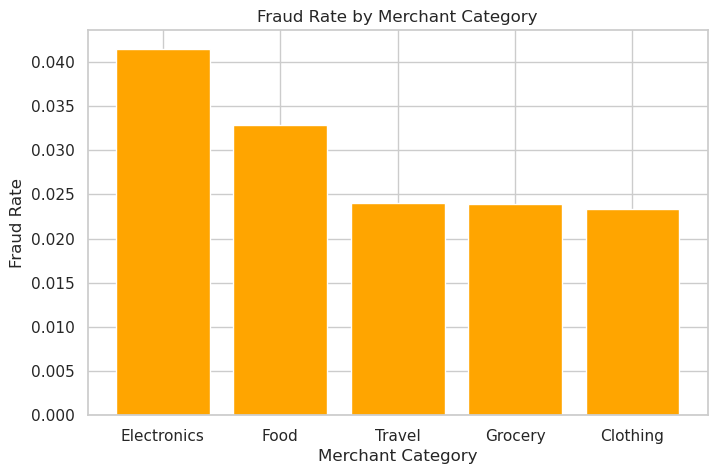

In [6]:
fraud_by_category = (
    data.groupby("merchant_category")["is_fraud"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.bar(fraud_by_category["merchant_category"], fraud_by_category["is_fraud"], color="orange")
plt.title("Fraud Rate by Merchant Category")
plt.xlabel("Merchant Category")
plt.ylabel("Fraud Rate")
plt.show()

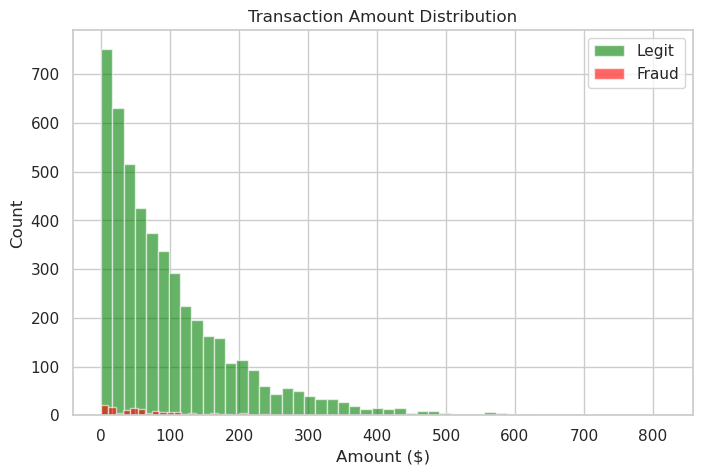

In [7]:
plt.hist(
    data[data["is_fraud"] == 0]["amount"], bins=50, alpha=0.6, label="Legit", color="green"
)
plt.hist(
    data[data["is_fraud"] == 1]["amount"], bins=50, alpha=0.6, label="Fraud", color="red"
)
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Count")
plt.show()

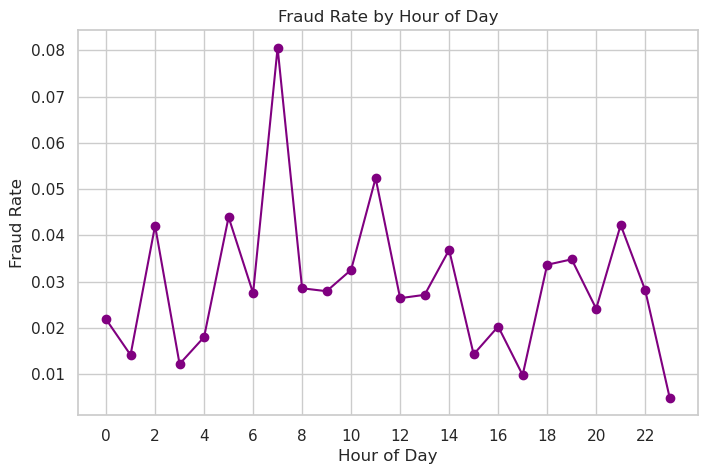

In [8]:
fraud_by_hour = data.groupby("hour_of_day")["is_fraud"].mean().reset_index()

plt.plot(fraud_by_hour["hour_of_day"], fraud_by_hour["is_fraud"], marker="o", color="purple")
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fraud Rate")
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

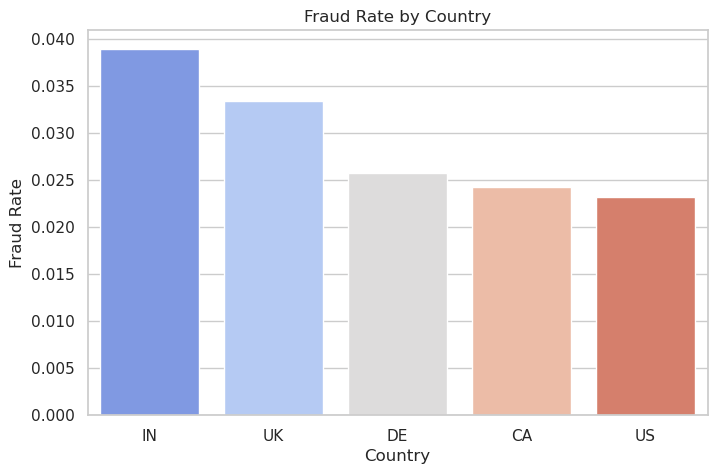

In [9]:
fraud_by_country = (
    data.groupby("country")["is_fraud"].mean().sort_values(ascending=False).reset_index()
)

sns.barplot(x="country", y="is_fraud", data=fraud_by_country, palette="coolwarm")
plt.title("Fraud Rate by Country")
plt.xlabel("Country")
plt.ylabel("Fraud Rate")
plt.show()


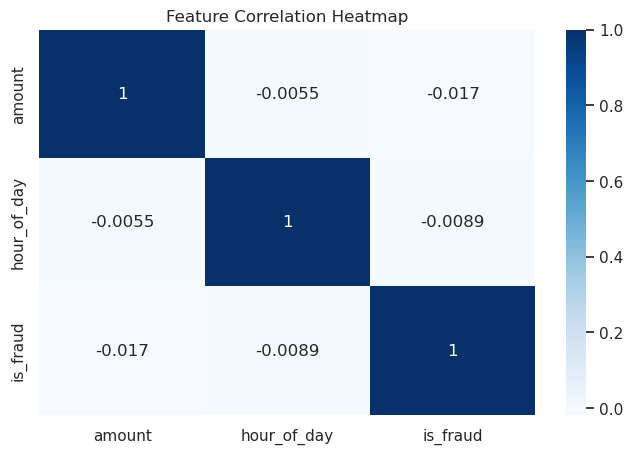

In [10]:
corr = data[["amount", "hour_of_day", "is_fraud"]].corr()

sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

### 📊 Insights Summary

- Fraud rate is approximately **3%** in this dataset.  
- Certain categories (e.g., Electronics, Travel) show higher fraud rates.  
- Fraudulent transactions tend to have **higher average amounts**.  
- Fraud occurrences slightly increase during **late night hours**.  
- Country-level differences suggest possible regional risk patterns.